# Simulación de eventos discretos, Teoría de colas
## Integrantes:
- **José Miguel Zayas Pérez** (tlgrm: @nex25k) _____ C312
- **Adrián Hernández Santos** (tlgrm: @ahdez929) _____ C311

In [23]:
from simulation import simulate_call_center

### Ejemplo
Se realiza una simulación para 5 empleados y se visualizan los resultados obtenidos.

In [22]:
from analysis import *

PARAMETERS = {
    'time': 180, 
    'operators': 5,
    'duration_mean': 6,
    'arrival_mean': 3
}

sim_result = simulate_call_center(PARAMETERS)

analize = Analizer(sim_result, PARAMETERS['operators'])

print(analize)



        Calls: 74
        Successful calls: 71
        Lost calls: 3
        Average call duration: 5.454568479770283
        Max call duration: 34.09165809041312
        Min call duration: 0.02444397959720228
        Total time: 167.68552041952802
        Lost money: 378.0
        Employees: 5
        Employees cost: 960
        


Se realizan 2000 simulaciones para cada empleado y se va guardando la información de cada una.

In [13]:

simulation_count = 2000

data_w_employees = []
for employees_cant in range(1,8):
    data = []
    for i in range(simulation_count):
        PARAMETERS['operators'] = employees_cant
        simu_result = simulate_call_center(PARAMETERS)
        analize = Analizer(simu_result,employees_cant)
        data.append(analize)
    data_w_employees.append((employees_cant, data))

Se procesan los datos obtenidos anteriormente y se calculan diferentes valores estadísitcos, posteriormente se grafican y se muestran los resultados obtenidos.

El precio de un empleado en 8h es 192

Analisis para 1 empleados

        Llamadas Perdidas
        Media: 39.3915
        Mediana: 39.0
        Varianza: 54.681227750000005
        Desviacion: 7.394675635212136
        Minimo: 18
        Maximo: 69
        


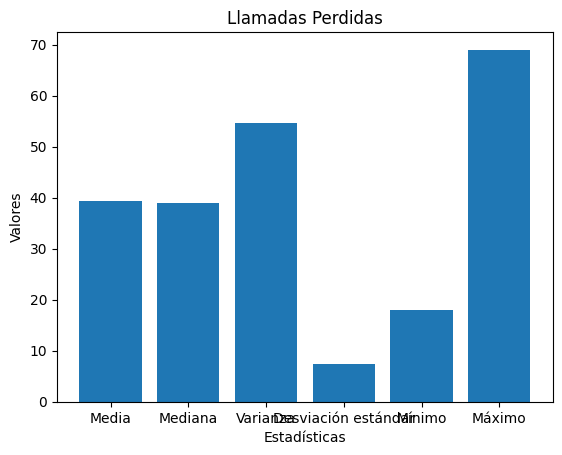

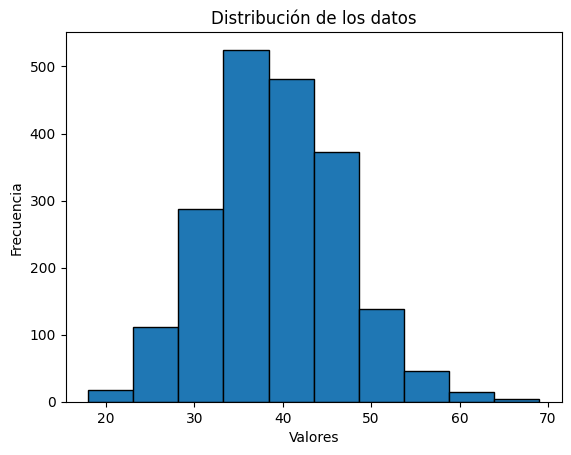


        Dinero Perdido
        Media: 4963.329
        Mediana: 4914.0
        Varianza: 868119.171759
        Desviacion: 931.7291300367291
        Minimo: 2268.0
        Maximo: 8694.0
        


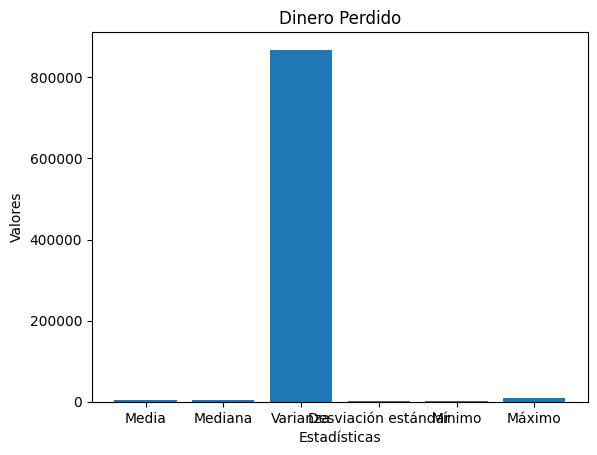

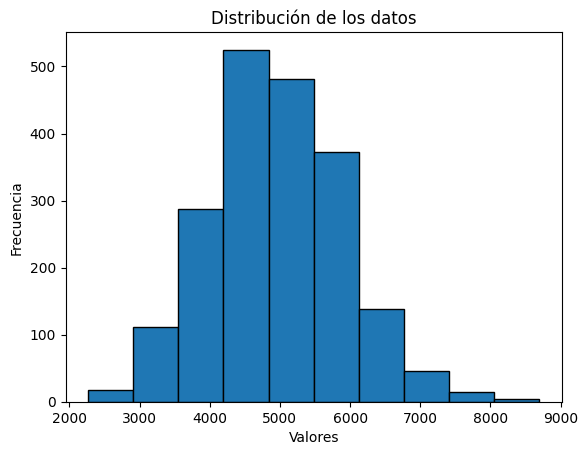

Analisis para 2 empleados

        Llamadas Perdidas
        Media: 23.7265
        Mediana: 23.0
        Varianza: 43.31169775
        Desviacion: 6.581162340346879
        Minimo: 5
        Maximo: 47
        


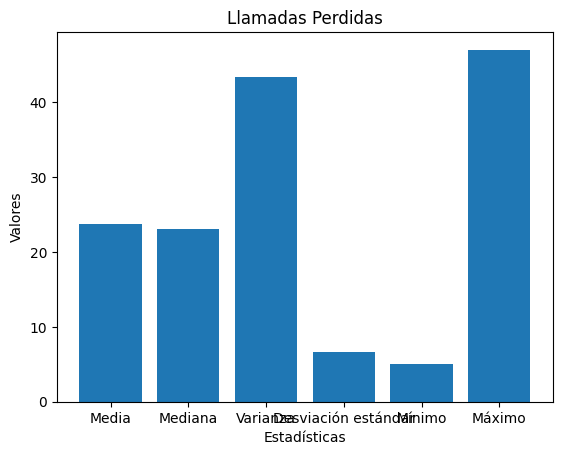

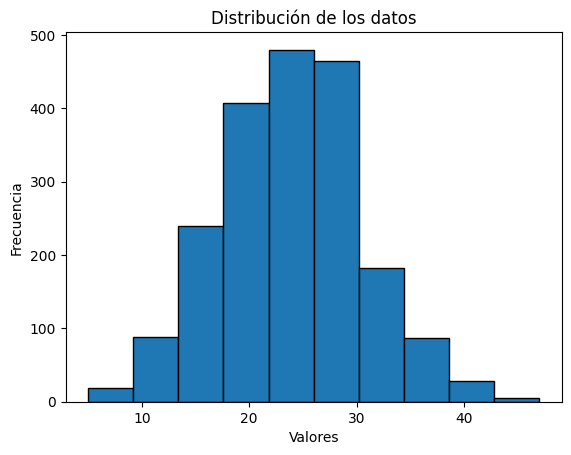


        Dinero Perdido
        Media: 2989.539
        Mediana: 2898.0
        Varianza: 687616.5134790001
        Desviacion: 829.2264548837067
        Minimo: 630.0
        Maximo: 5922.0
        


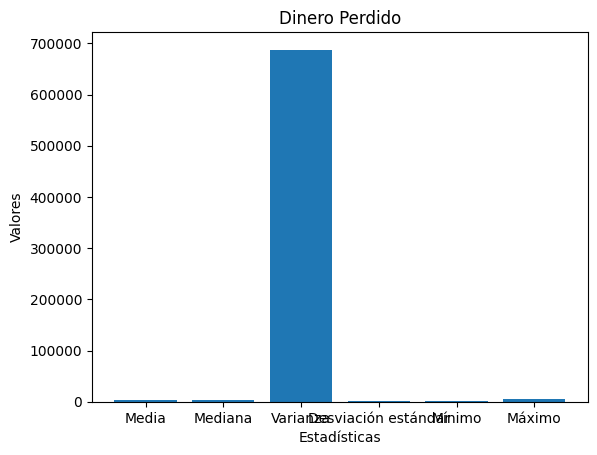

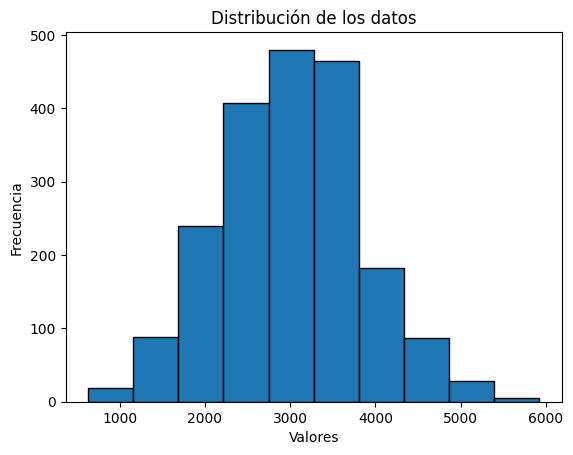

Analisis para 3 empleados

        Llamadas Perdidas
        Media: 11.9945
        Mediana: 11.0
        Varianza: 24.36746975
        Desviacion: 4.936341737562342
        Minimo: 0
        Maximo: 34
        


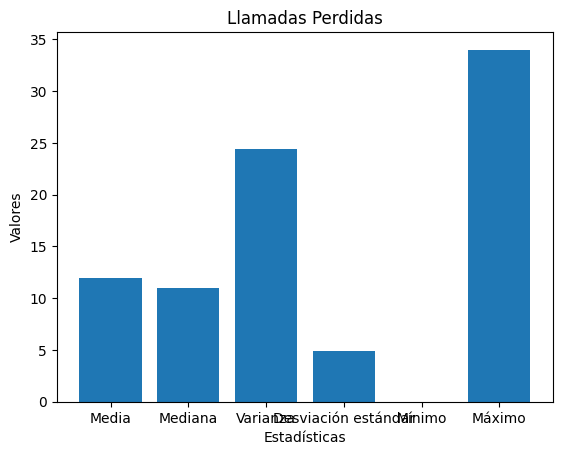

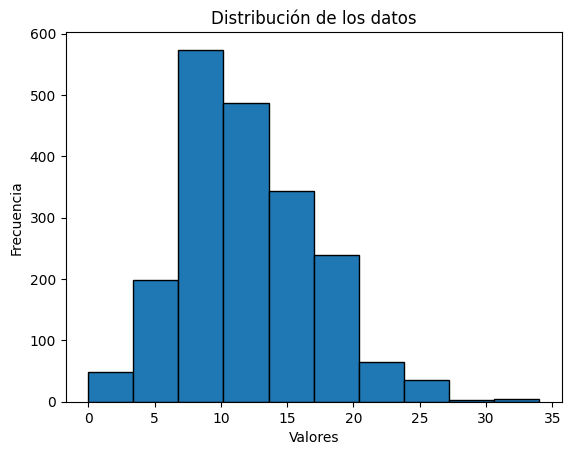


        Dinero Perdido
        Media: 1511.307
        Mediana: 1386.0
        Varianza: 386857.949751
        Desviacion: 621.9790589328551
        Minimo: 0.0
        Maximo: 4284.0
        


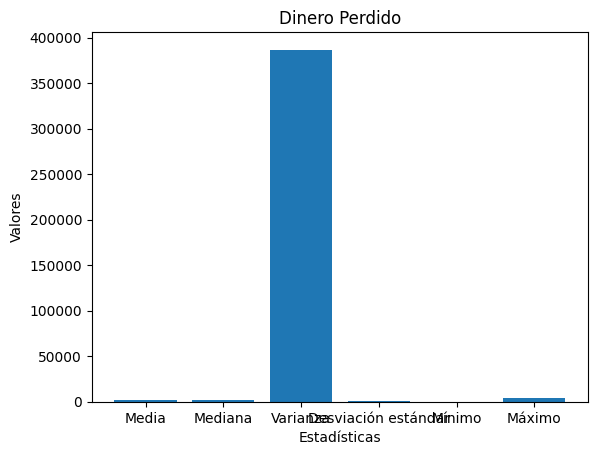

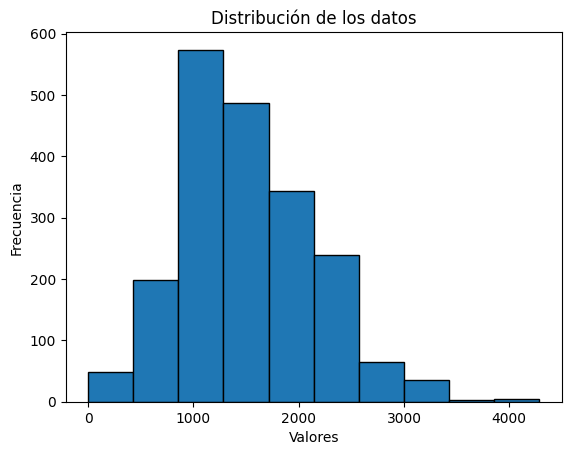

Analisis para 4 empleados

        Llamadas Perdidas
        Media: 5.4165
        Mediana: 5.0
        Varianza: 12.112027750000001
        Desviacion: 3.4802338642683197
        Minimo: 0
        Maximo: 20
        


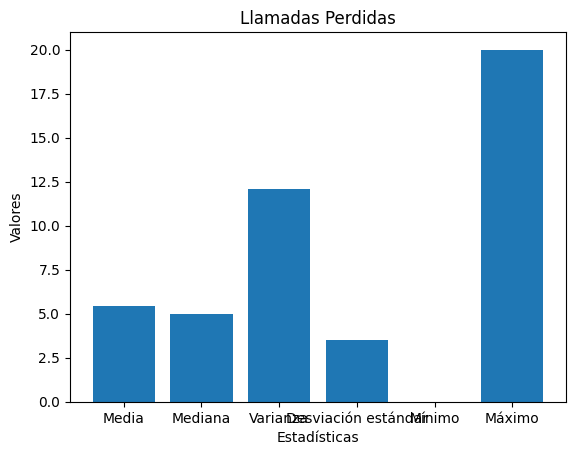

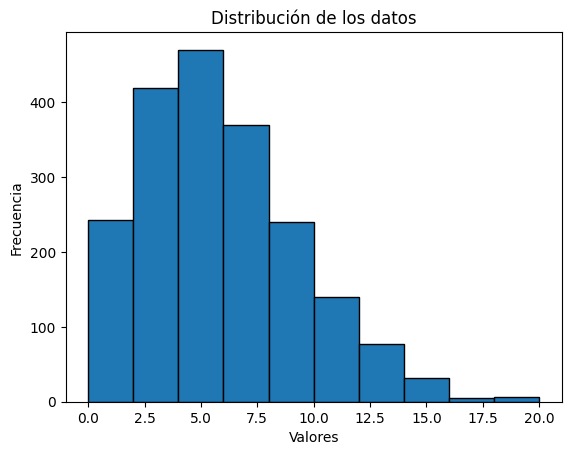


        Dinero Perdido
        Media: 682.479
        Mediana: 630.0
        Varianza: 192290.552559
        Desviacion: 438.50946689780824
        Minimo: 0.0
        Maximo: 2520.0
        


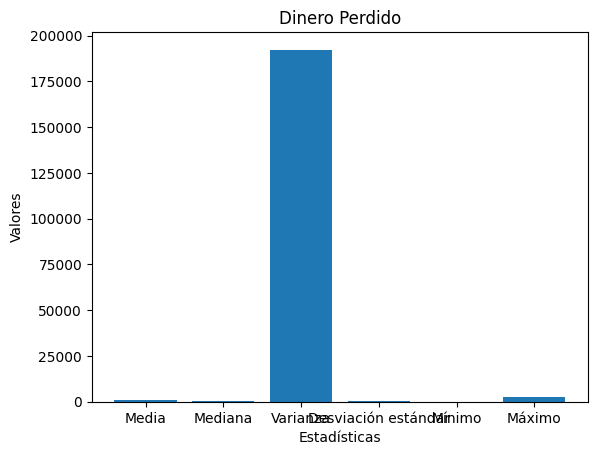

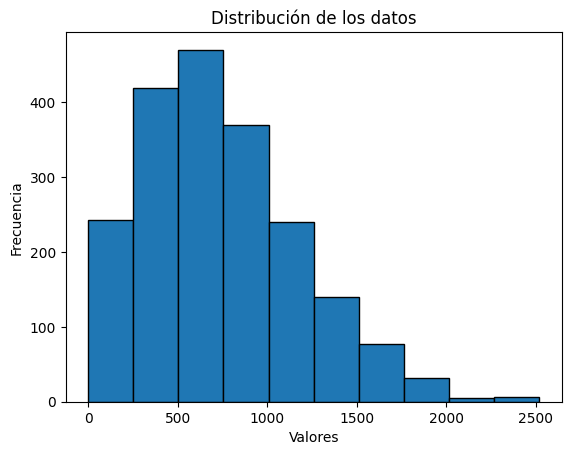

Analisis para 5 empleados

        Llamadas Perdidas
        Media: 2.124
        Mediana: 2.0
        Varianza: 4.739624
        Desviacion: 2.1770677527353164
        Minimo: 0
        Maximo: 19
        


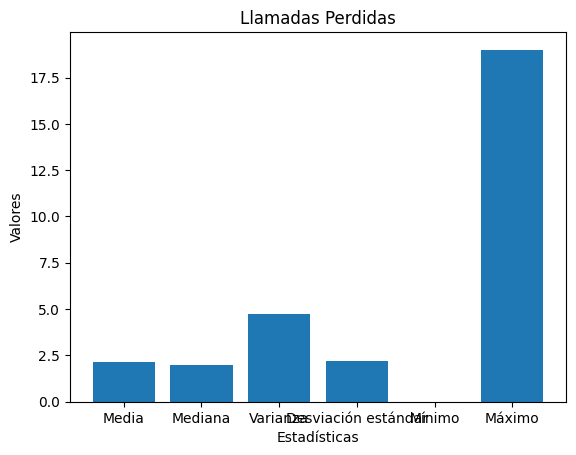

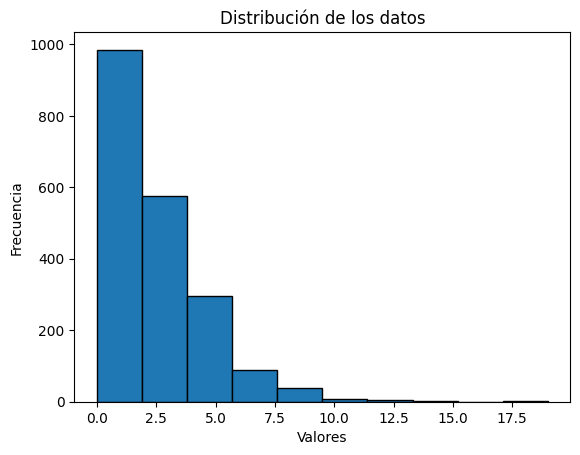


        Dinero Perdido
        Media: 267.624
        Mediana: 252.0
        Varianza: 75246.27062400001
        Desviacion: 274.31053684464985
        Minimo: 0.0
        Maximo: 2394.0
        


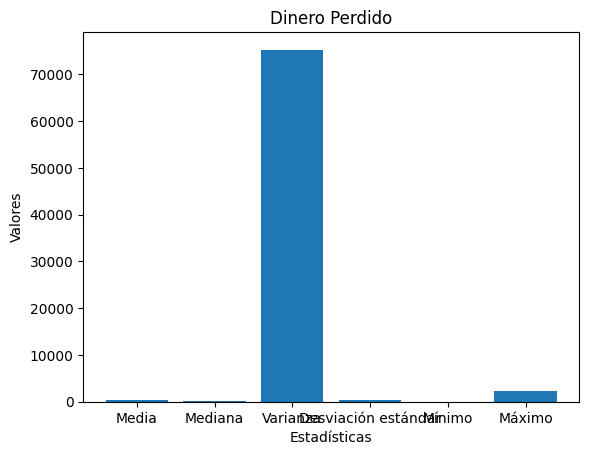

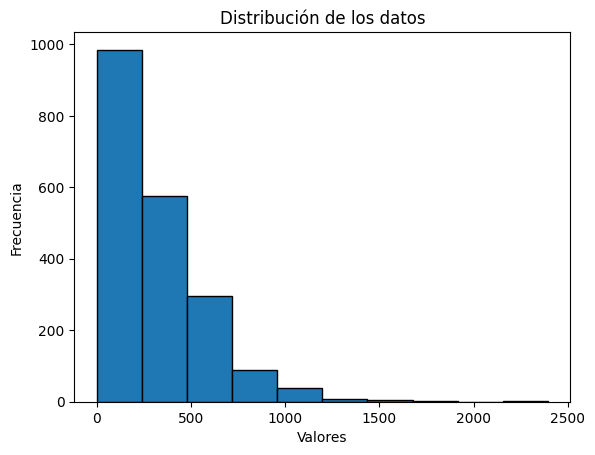

Analisis para 6 empleados

        Llamadas Perdidas
        Media: 0.711
        Mediana: 0.0
        Varianza: 1.5784790000000002
        Desviacion: 1.2563753420057242
        Minimo: 0
        Maximo: 10
        


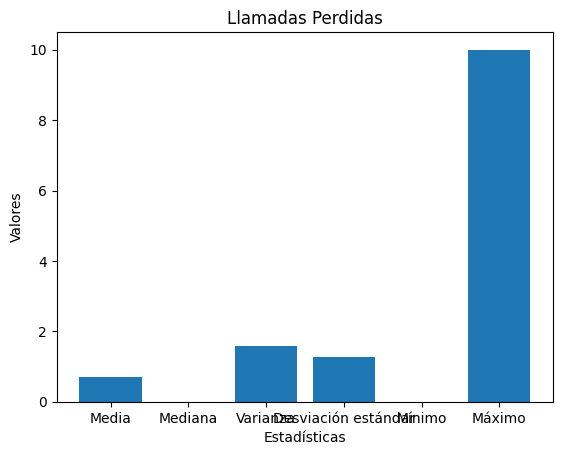

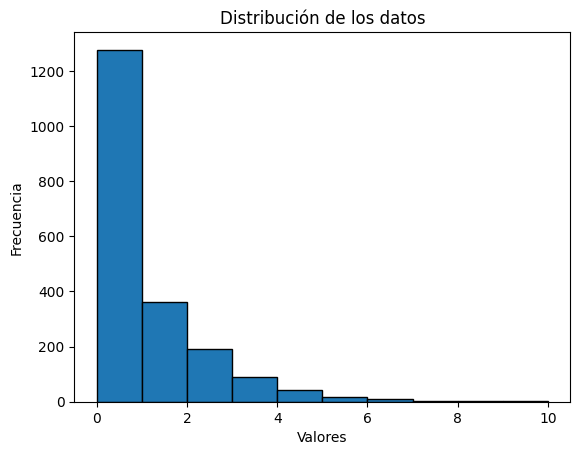


        Dinero Perdido
        Media: 89.586
        Mediana: 0.0
        Varianza: 25059.932604
        Desviacion: 158.30329309272122
        Minimo: 0.0
        Maximo: 1260.0
        


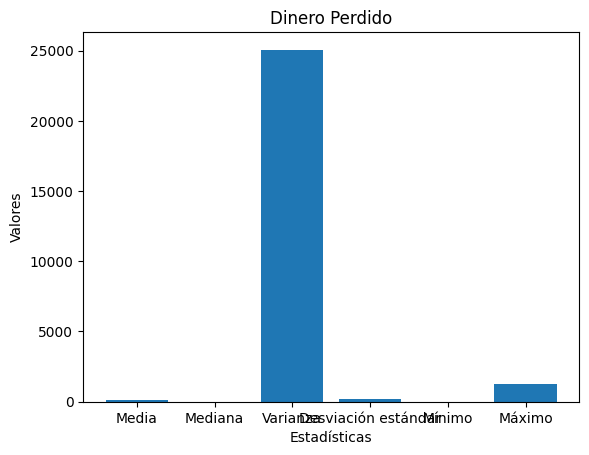

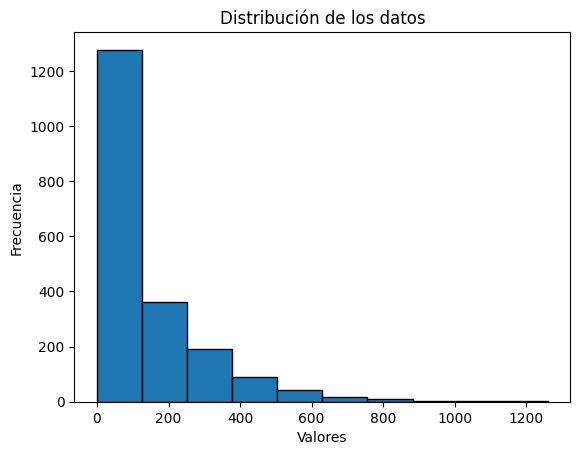

Analisis para 7 empleados

        Llamadas Perdidas
        Media: 0.186
        Mediana: 0.0
        Varianza: 0.302404
        Desviacion: 0.5499127203475112
        Minimo: 0
        Maximo: 4
        


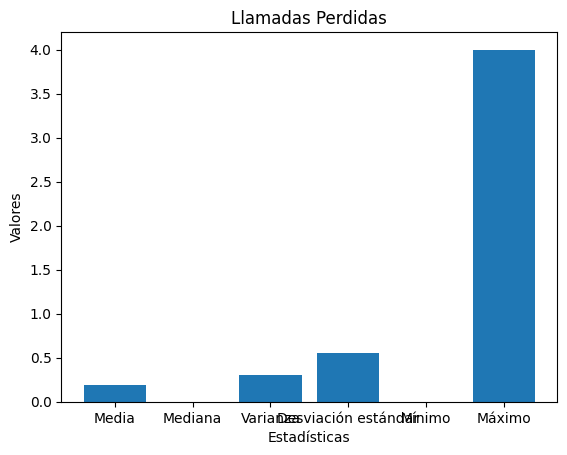

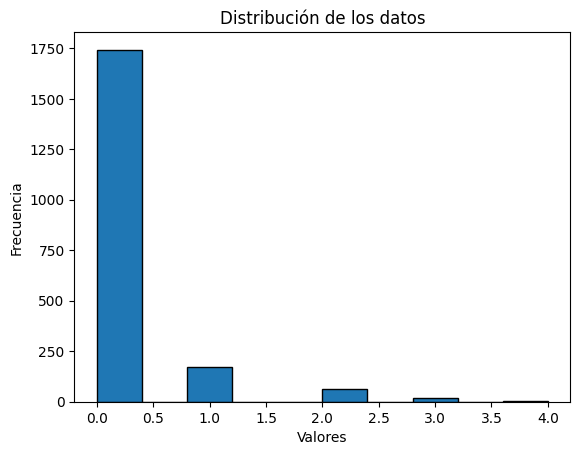


        Dinero Perdido
        Media: 23.436
        Mediana: 0.0
        Varianza: 4800.965903999999
        Desviacion: 69.2890027637864
        Minimo: 0.0
        Maximo: 504.0
        


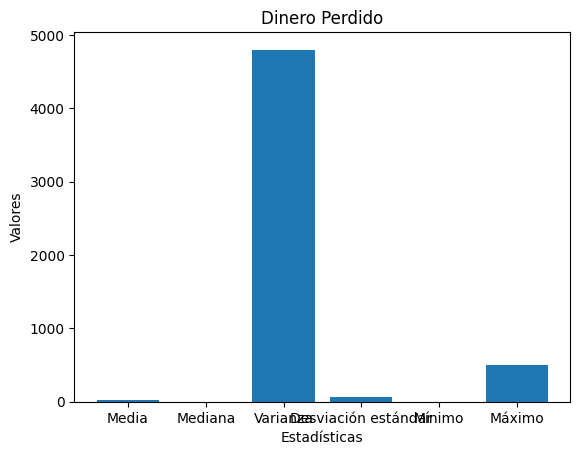

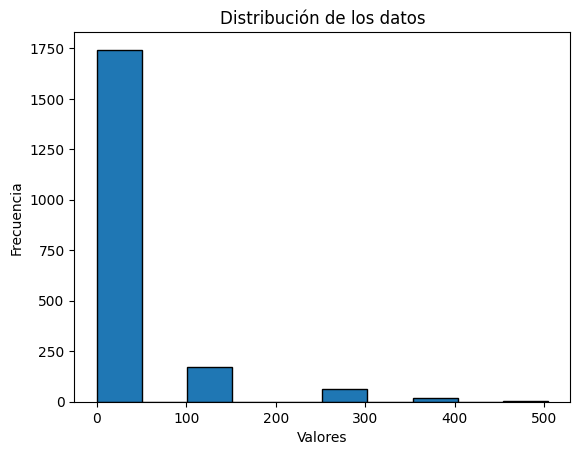

In [25]:
from utils import s_data, analysis

print("El precio de un empleado en 8h es {0}".format(8*24))
print()
for employees, data in data_w_employees:
    print(f"Analisis para {employees} empleados")
    calls, successful_calls, lost_calls, average_call_duration, max_call_duration, min_call_duration, lost_money, total_time = s_data(data)
    analysis(lost_calls,"Llamadas Perdidas",True)
    analysis(lost_money,"Dinero Perdido",True)
    


In [1]:
# formula de Erlang (M/M/C/C)
import math



def erlang(lambd, mu, c, n):
    p0 = 0
    for i in range(c+1):
        p0 += (lambd/mu)**i / math.factorial(i)
    pn = ((lambd/mu)**n / math.factorial(n)) / p0
    return pn

lambd = 1/3
mu = 1/6
r = lambd / mu

def erlang_pc(r,c):
    num= (r**c / math.factorial(c)) 
    den = ([r**i / math.factorial(i) for i in range(c+1)])
    return num / sum(den)

def erlang_L(r, Pc):
    return r *(1 - Pc)

def erlang_W(Pc, L, lambd):
    return L / (lambd * (1 - Pc))

for i in range(3,8):
    print(f"Para {i} empleados")
    pc = erlang_pc(2,i)
    l = erlang_L(2, pc)
    w = erlang_W(pc, l, lambd)
    print(f"Probabilidad del sistema lleno: {pc}")
    print(f"Número medio de clientes en el sistema: {l}")
    print(f"Tiempo medio de estancia en el sistema: {w}")


Para 3 empleados
Probabilidad del sistema lleno: 0.21052631578947367
Número medio de clientes en el sistema: 1.5789473684210527
Tiempo medio de estancia en el sistema: 6.0
Para 4 empleados
Probabilidad del sistema lleno: 0.09523809523809523
Número medio de clientes en el sistema: 1.8095238095238095
Tiempo medio de estancia en el sistema: 6.0
Para 5 empleados
Probabilidad del sistema lleno: 0.03669724770642202
Número medio de clientes en el sistema: 1.926605504587156
Tiempo medio de estancia en el sistema: 6.000000000000001
Para 6 empleados
Probabilidad del sistema lleno: 0.012084592145015107
Número medio de clientes en el sistema: 1.9758308157099698
Tiempo medio de estancia en el sistema: 6.0
Para 7 empleados
Probabilidad del sistema lleno: 0.003440860215053764
Número medio de clientes en el sistema: 1.9931182795698925
Tiempo medio de estancia en el sistema: 6.0
